DISCLAIMER: we run all the way until the model fitting but we needed to go back to drop more numerical variables base don the correlation. We did not go through that because it was very time consuming but we acknoledge the corrections review with Flo

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)

In [3]:
data=pd.read_csv('fifa21_trainning.csv')

In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [5]:
data.dtypes

Unnamed: 0            int64
ID                    int64
Name                 object
Age                   int64
Nationality          object
Club                 object
BP                   object
Position             object
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement              int64
Acceleration          int64
Sprint Speed          int64
Agility             float64
Reactions           

In [6]:
data.columns = [val.lower().replace(' ','_') for val in data.columns]
data.columns

Index(['unnamed:_0', 'id', 'name', 'age', 'nationality', 'club', 'bp',
       'position', 'team_&_contract', 'height',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova'],
      dtype='object', length=102)

In [7]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape) #no duplicates

(13700, 102)
(13700, 102)


In [8]:
data.isna().sum()

unnamed:_0              0
id                      0
name                    0
age                     0
nationality             0
club                   21
bp                      0
position              343
team_&_contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 44
loan_date_end       12961
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                44
skill                   0
dribbling               0
curve                  44
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility                44
reactions               0
balance                44
power                   0
shot_power  

In [9]:
# def log_transfom_clean_(x):
#     x = np.log(x)
#     if np.isfinite(x):
#         return x
#     else:
#         return np.NAN # We are returning NaNs so that we can replace them with means later   
# data['position'] = list(map(log_transfom_clean_, data['position']))

In [10]:
data = data.replace(np.nan,0)
data.isna().sum()

unnamed:_0          0
id                  0
name                0
age                 0
nationality         0
club                0
bp                  0
position            0
team_&_contract     0
height              0
weight              0
foot                0
growth              0
joined              0
loan_date_end       0
value               0
wage                0
release_clause      0
contract            0
attacking           0
crossing            0
finishing           0
heading_accuracy    0
short_passing       0
volleys             0
skill               0
dribbling           0
curve               0
fk_accuracy         0
long_passing        0
ball_control        0
movement            0
acceleration        0
sprint_speed        0
agility             0
reactions           0
balance             0
power               0
shot_power          0
jumping             0
stamina             0
strength            0
long_shots          0
mentality           0
aggression          0
intercepti

In [11]:
data=data.drop(columns= ['loan_date_end'])

In [12]:
for i in data.columns:
    print(data[i].unique())

[ 1954  2225  1959 ...  5390   860 15795]
[184383 188044 184431 ... 210930 162993 254882]
['A. Pasche' 'Alan Carvalho' 'S. Giovinco' ... 'Carles Gil' 'J. Perch'
 'A. Oeynhausen']
[26 30 33 22 23 34 35 37 21 27 17 28 25 24 18 20 29 32 19 31 38 36 39 42
 40 41 16 43 47]
['Switzerland' 'China PR' 'Italy' 'Wales' 'France' 'Bosnia Herzegovina'
 'Argentina' 'Paraguay' 'Uruguay' 'United States' 'Mexico' 'Chile'
 'Germany' 'Nigeria' 'Spain' 'Norway' 'Russia' 'England'
 'Republic of Ireland' 'Cape Verde' 'Bulgaria' 'Zambia' 'Honduras'
 'Albania' 'Finland' 'Ghana' 'Japan' 'Cameroon' 'Peru' 'Austria' 'Congo'
 'Colombia' 'Belgium' 'Brazil' 'Korea Republic' 'Hungary' 'Morocco'
 'Kosovo' 'Netherlands' 'Sweden' 'Scotland' 'Denmark' 'Northern Ireland'
 'Turkey' 'Poland' 'Ivory Coast' 'Bolivia' 'Ukraine' 'Ecuador' 'Malaysia'
 'DR Congo' 'Mali' 'Romania' 'Slovenia' 'United Arab Emirates' 'Australia'
 'Venezuela' 'Montenegro' 'Slovakia' 'Curacao' 'Portugal' 'Senegal'
 'Lebanon' 'Serbia' 'Iran' 'Zimbabwe'

In [13]:
def drop_str(x):
    if not x[-3].isdigit():
        x=float(x.rstrip('lbs'))  
        return x

In [14]:
data['weight']=data['weight'].apply(drop_str)

In [15]:
type(data['weight'][0])

numpy.float64

In [16]:
def curr_transf(x):
    x=x.lstrip('€')
    if not x[-1].isnumeric():
        if x[-1] == 'M':
            return float(x.rstrip('M'))*1000000
        elif x[-1] == 'K':
            return float(x.rstrip('K'))*1000
    else:
        return float(x)
    

In [17]:
data['value']=data['value'].apply(curr_transf)
    

In [18]:
data['hits']=data['hits'].apply(curr_transf)

In [19]:
data['wage']=data['wage'].apply(curr_transf)

In [20]:
data['release_clause']=data['release_clause'].apply(curr_transf)

In [21]:
print(data['wage'])

0         4000.0
1        23000.0
2        49000.0
3         4000.0
4         2000.0
          ...   
13695     1000.0
13696      700.0
13697     9000.0
13698     4000.0
13699     1000.0
Name: wage, Length: 13700, dtype: float64


In [22]:
def clean_star(x):
    x=x.rstrip('★')
    return float(x)
    
    

In [23]:
data['w/f']=data['w/f'].apply(clean_star)

In [24]:
data['sm']=data['sm'].apply(clean_star)

In [25]:
data['ir']=data['ir'].apply(clean_star)

In [26]:
print(data['ir'])

0        1.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
13695    1.0
13696    1.0
13697    2.0
13698    1.0
13699    1.0
Name: ir, Length: 13700, dtype: float64


In [27]:
for i in data.columns:
    print(data[i].unique())

[ 1954  2225  1959 ...  5390   860 15795]
[184383 188044 184431 ... 210930 162993 254882]
['A. Pasche' 'Alan Carvalho' 'S. Giovinco' ... 'Carles Gil' 'J. Perch'
 'A. Oeynhausen']
[26 30 33 22 23 34 35 37 21 27 17 28 25 24 18 20 29 32 19 31 38 36 39 42
 40 41 16 43 47]
['Switzerland' 'China PR' 'Italy' 'Wales' 'France' 'Bosnia Herzegovina'
 'Argentina' 'Paraguay' 'Uruguay' 'United States' 'Mexico' 'Chile'
 'Germany' 'Nigeria' 'Spain' 'Norway' 'Russia' 'England'
 'Republic of Ireland' 'Cape Verde' 'Bulgaria' 'Zambia' 'Honduras'
 'Albania' 'Finland' 'Ghana' 'Japan' 'Cameroon' 'Peru' 'Austria' 'Congo'
 'Colombia' 'Belgium' 'Brazil' 'Korea Republic' 'Hungary' 'Morocco'
 'Kosovo' 'Netherlands' 'Sweden' 'Scotland' 'Denmark' 'Northern Ireland'
 'Turkey' 'Poland' 'Ivory Coast' 'Bolivia' 'Ukraine' 'Ecuador' 'Malaysia'
 'DR Congo' 'Mali' 'Romania' 'Slovenia' 'United Arab Emirates' 'Australia'
 'Venezuela' 'Montenegro' 'Slovakia' 'Curacao' 'Portugal' 'Senegal'
 'Lebanon' 'Serbia' 'Iran' 'Zimbabwe'

[5.25e+05 8.50e+06 9.00e+06 2.75e+05 7.25e+05 1.40e+06 6.00e+06 3.00e+05
 2.10e+05 2.20e+05 6.25e+05 6.50e+05 8.00e+05 5.00e+06 1.30e+05 1.10e+06
 3.25e+05 8.25e+05 5.00e+05 3.50e+05 1.00e+06 4.75e+05 1.60e+05 6.75e+05
 1.45e+07 9.00e+05 0.00e+00 4.25e+05 4.50e+05 6.00e+04 1.00e+07 1.80e+06
 7.50e+05 7.00e+05 1.50e+06 1.65e+07 6.50e+06 1.80e+05 2.60e+06 4.10e+07
 6.00e+05 2.00e+05 3.20e+06 4.40e+07 2.70e+06 4.50e+06 8.75e+05 7.50e+06
 1.10e+05 1.15e+07 9.75e+05 2.30e+06 5.50e+05 1.70e+05 8.50e+05 9.25e+05
 7.75e+05 8.00e+04 3.30e+06 5.75e+05 3.75e+05 1.30e+06 1.20e+06 3.50e+06
 1.90e+06 1.90e+05 2.50e+05 1.95e+07 1.00e+05 9.00e+04 5.50e+06 4.20e+06
 1.40e+05 4.00e+05 2.90e+06 4.40e+06 2.00e+06 2.40e+05 4.60e+06 2.30e+05
 7.00e+06 2.80e+06 1.35e+07 4.30e+06 8.00e+06 4.80e+06 2.05e+07 1.50e+05
 9.50e+06 2.10e+06 1.20e+05 3.60e+06 1.55e+07 1.25e+07 3.40e+06 2.50e+06
 1.70e+06 4.15e+07 1.60e+06 2.40e+06 1.30e+07 1.40e+07 3.90e+06 3.00e+06
 1.20e+07 1.50e+07 9.50e+05 4.00e+06 1.05e+07 3.80e

[ 9  7  3  5  8 12 10 11 16 14 62 60 67  6 15 21 13 64 75  4 50 68 82 66
 70 61 72 48 71 65 83 57 77 81 63 59 73 54 74 87 56 22 52 58 69 55 53 76
 78 23 18 19 51 79 46 80 49  2 45 25 44 41 84 93 20 42 47 88 24 85 91 40
 17 43 32 39 90 86]
[ 6 16  3 12 15  7  9 11 10 13 66 14 58 72  8 21 65  5 18 79 69 70 84 67
 74 61 76 68 73 64 71 83 89 78 59 63 75 55 85 60 22 51 77 62 86 81 45 88
 54 80 23 20 53 56 57 82 52  4 50 25  2  1 46 48 90 87 34 44 17 19 24 39
 32 47]
[1682 1961 1925 ... 2205 1124  928]
[357 412 404 329 360 379 410 327 338 381 337 339 376 396 282 355 366 343
 385 310 347 345 322 358 413 402 387 316 285 302 312 297 306 308 398 370
 403 420 317 293 346 303 406 416 324 352 454 332 382 362 443 369 399 290
 428 314 383 419 363 276 335 388 351 291 296 336 380 378 333 407 375 386
 397 401 430 350 313 442 330 435 326 414 389 427 424 384 374 394 365 364
 409 354 393 328 320 340 284 439 315 367 417 349 331 423 323 408 318 294
 342 289 309 319 400 348 361 356 450 415 359 305 299 447 300

['59+1' '57+2' '59+2' '56+2' '64+2' '58+2' '74+2' '52+2' '65+2' '48+2'
 '67+1' '71+2' '51+2' '27+2' '72+-1' '50+2' '60+2' '18+2' '28+2' '43+2'
 '49+2' '53+2' '63+1' '41+2' '54+2' '54+0' '47+2' '63+2' '54+1' '67+2'
 '73+0' '38+2' '40+2' '73+2' '61+2' '78+2' '65+3' '17+2' '70+3' '66+1'
 '55+2' '66+2' '27+1' '39+1' '62+2' '67+0' '72+2' '65+0' '68+2' '20+2'
 '74+0' '69+2' '57+1' '80+2' '75+2' '36+2' '46+2' '15+2' '75+1' '27+3'
 '60+1' '66+-1' '42+2' '37+1' '30+2' '56+3' '79+1' '29+2' '22+2' '39+2'
 '56+1' '53+1' '45+2' '45+1' '70+2' '62+1' '43+1' '77+2' '26+2' '25+2'
 '47+1' '31+2' '24+2' '30+3' '44+2' '52+1' '21+2' '19+2' '70+-1' '68+0'
 '61+1' '69+1' '33+2' '49+3' '65+1' '71+1' '72+3' '78+1' '64+1' '48+0'
 '51+1' '76+2' '61+3' '58+0' '31+3' '25+1' '62+0' '47+0' '50+3' '74+1'
 '71+-1' '55+1' '68+3' '32+3' '37+2' '53+3' '47+3' '66+3' '23+2' '70+1'
 '78+0' '46+1' '71+3' '28+3' '79+2' '79+3' '73+3' '75+3' '63+0' '50+0'
 '52+0' '32+1' '75+0' '73+1' '58+1' '55+0' '60+3' '63+-1' '57+3' '42+1'
 

In [28]:
data['joined']= pd.to_datetime(data['joined'],errors='coerce')


In [29]:
data.head(2)

,unnamed:_0,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161.0,Right,1,2015-07-01,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4.0,2.0,High,Medium,1.0,69,51,63,63,51,60,3.0,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159.0,Right,0,2015-01-16,8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3.0,4.0,High,Low,2.0,83,75,68,82,33,71,44.0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77


In [30]:
def split_sum(x):
    if '+' in x:
        x= list(x.split("+"))
        b= int(x[0])+int(x[1])
        return b

In [31]:
data['ls']=data['ls'].apply(split_sum)

In [32]:
data['st']=data['st'].apply(split_sum)

In [33]:
data['rs']=data['rs'].apply(split_sum)

In [34]:
data['lw']=data['lw'].apply(split_sum)

In [35]:
data['lf']=data['lf'].apply(split_sum)

In [36]:
data['cf']=data['cf'].apply(split_sum)

In [37]:
data['rf']=data['rf'].apply(split_sum)

In [38]:
data['rw']=data['rw'].apply(split_sum)

In [39]:
data['lam']=data['lam'].apply(split_sum)

In [40]:
data['cam']=data['cam'].apply(split_sum)

In [41]:
data['ram']=data['ram'].apply(split_sum)

In [42]:
data['lm']=data['lm'].apply(split_sum)

In [43]:
data['lcm']=data['lcm'].apply(split_sum)

In [44]:
data['cm']=data['cm'].apply(split_sum)

In [45]:
data['rcm']=data['rcm'].apply(split_sum)

In [46]:
data['rm']=data['rm'].apply(split_sum)

In [47]:
data['lwb']=data['lwb'].apply(split_sum)

In [48]:
data['ldm']=data['ldm'].apply(split_sum)

In [49]:
data['cdm']=data['cdm'].apply(split_sum)

In [50]:
data['rdm']=data['rdm'].apply(split_sum)

In [51]:
data['rwb']=data['rwb'].apply(split_sum)

In [52]:
data['lb']=data['lb'].apply(split_sum)

In [53]:
data['lcb']=data['lcb'].apply(split_sum)

In [54]:
data['cb']=data['cb'].apply(split_sum)

In [55]:
data['rcb']=data['rcb'].apply(split_sum)

In [56]:
data['rb']=data['rb'].apply(split_sum)

In [57]:
data['gk']=data['gk'].apply(split_sum)

In [58]:
data.head(2)

,unnamed:_0,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161.0,Right,1,2015-07-01,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4.0,2.0,High,Medium,1.0,69,51,63,63,51,60,3.0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159.0,Right,0,2015-01-16,8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3.0,4.0,High,Low,2.0,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77


In [59]:
def parse_ht(ht):
    ht_strip=ht.rstrip('"')
    ht_ = ht_strip.split('\'')
    ft_in=float(ht_[0])*12
    final=float(ht_[1])+ft_in
    return final*2.54


In [60]:
data['height']=data['height'].apply(parse_ht)

In [61]:
data=data.drop(columns= ['id','team_&_contract', 'contract', 'unnamed:_0'], axis=1)

In [62]:
data.head()

,name,age,nationality,club,bp,position,height,weight,foot,growth,joined,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,175.26,161.0,Right,1,2015-07-01,525000.0,4000.0,801000.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4.0,2.0,High,Medium,1.0,69,51,63,63,51,60,3.0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,182.88,159.0,Right,0,2015-01-16,8500000.0,23000.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3.0,4.0,High,Low,2.0,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,162.56,134.0,Right,0,2019-01-31,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4.0,4.0,High,Medium,2.0,80,77,78,86,27,56,73.0,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,177.80,152.0,Right,13,2016-07-01,275000.0,4000.0,694000.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2.0,2.0,Medium,Medium,1.0,57,44,54,57,57,60,7.0,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,180.34,150.0,Right,8,2018-07-01,725000.0,2000.0,1400000.0,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2.0,3.0,Low,Medium,1.0,66,44,60,64,60,66,4.0,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65


In [63]:
# mean_income = np.mean(X_num['release_clause'])
# X_num=X_num.replace({'income': {0: mean_income}}) 

all functions 

In [64]:
# def parse_ht(ht):
#     ht_strip=ht.rstrip('"')
#     ht_ = ht_strip.split('\'')
#     ft_in=float(ht_[0])*12
#     final=float(ht_[1])+ft_in
#     return final*2.54

# def split_sum(x):
#     if '+' in x:
#         x= list(x.split("+"))
#         b= int(x[0])+int(x[1])
#         return b
    
# def clean_star(x):
#     x=x.rstrip('★')
#     return float(x)

# def curr_transf(x):
#     x=x.lstrip('€')
#     if not x[-1].isnumeric():
#         if x[-1] == 'M':
#             return float(x.rstrip('M'))*1000000
#         elif x[-1] == 'K':
#             return float(x.rstrip('K'))*1000
#     else:
#         return float(x)
    
# def drop_str(x):
#     if not x[-3].isdigit():
#         x=x.rstrip('lbs')  
#         return x

In [65]:
# def cleaner_FIFA(df):
#        for col in df.columns:
#             if df[col].str.contains("\'").any():
#                 df[col]=df[col].apply(parse_ht)
#             elif df[col].str.contains('★').any():
#                 df[col]=df[col].apply(clean_star)
#             elif df[col].str.contains('€').any():
#                 df[col]=df[col].apply(clean_star)
#             elif df[col].str.contains('lbs').any():
#                 df[col]=df[col].apply(drop_str)
#             elif df[col].str.contains('+').any():
#                 df[col]=df[col].apply(split_sum)
#             return
 #we tried to automate the whole dataframe cleaning process but coulnt get the function to work           

In [66]:
# cleaner_FIFA(data)

In [67]:
# num_1=data[['st','gk']]
# num_1.head()

In [68]:
data=data.drop(columns=['ls','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb'],axis=1)
data=data.drop(columns=['release_clause','attacking','short_passing','dribbling','volleys','crossing'],axis=1)
data=data.drop(columns=['marking','standing_tackle','sliding_tackle','goalkeeping','gk_diving','gk_handling', 'gk_kicking','gk_positioning'],axis=1)

data.head(2)

,name,age,nationality,club,bp,position,height,weight,foot,growth,joined,value,wage,finishing,heading_accuracy,skill,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,st,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,175.26,161.0,Right,1,2015-07-01,525000.0,4000.0,47,43,286,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,6,1682,357,4.0,2.0,High,Medium,1.0,69,51,63,63,51,60,3.0,59,16,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,182.88,159.0,Right,0,2015-01-16,8500000.0,23000.0,79,76,375,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,16,1961,412,3.0,4.0,High,Low,2.0,83,75,68,82,33,71,44.0,77,20,77


In [69]:
data=data.drop(columns=['height','weight','finishing', 'heading_accuracy', 'skill', 'curve','fk_accuracy','ball_control','movement','acceleration', 'sprint_speed', 'agility','balance','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','penalties','defending','gk_reflexes','w/f','sm','pac','def','hits','gk'],axis=1)

In [70]:
data=data.drop(columns=['st','mentality'],axis=1)

In [71]:
num=data.select_dtypes(include = np.number)
num.head()

,age,growth,value,wage,long_passing,reactions,power,shot_power,vision,composure,total_stats,base_stats,ir,sho,pas,dri,phy,ova
0,26,1,525000.0,4000.0,63,66,306,62,68.0,54.0,1682,357,1.0,51,63,63,60,64
1,30,0,8500000.0,23000.0,63,75,372,74,72.0,70.0,1961,412,2.0,75,68,82,71,77
2,33,0,9000000.0,49000.0,74,78,308,79,78.0,82.0,1925,404,2.0,77,78,86,56,80
3,22,13,275000.0,4000.0,57,55,277,57,54.0,48.0,1527,329,1.0,44,54,57,60,59
4,23,8,725000.0,2000.0,61,62,280,61,64.0,58.0,1664,360,1.0,44,60,64,66,65


In [72]:
num.isna().sum()

age             0
growth          0
value           0
wage            0
long_passing    0
reactions       0
power           0
shot_power      0
vision          0
composure       0
total_stats     0
base_stats      0
ir              0
sho             0
pas             0
dri             0
phy             0
ova             0
dtype: int64

In [73]:
len(num.columns)

18

In [74]:
# num_1=pd.DataFrame(num.iloc[:,33:48])
# num_1.head()

In [75]:
# for col in num.columns:
#     sns.distplot(num[col])
#     plt.show()

In [76]:
num.head(3)

,age,growth,value,wage,long_passing,reactions,power,shot_power,vision,composure,total_stats,base_stats,ir,sho,pas,dri,phy,ova
0,26,1,525000.0,4000.0,63,66,306,62,68.0,54.0,1682,357,1.0,51,63,63,60,64
1,30,0,8500000.0,23000.0,63,75,372,74,72.0,70.0,1961,412,2.0,75,68,82,71,77
2,33,0,9000000.0,49000.0,74,78,308,79,78.0,82.0,1925,404,2.0,77,78,86,56,80


In [77]:
len(num.columns)

18

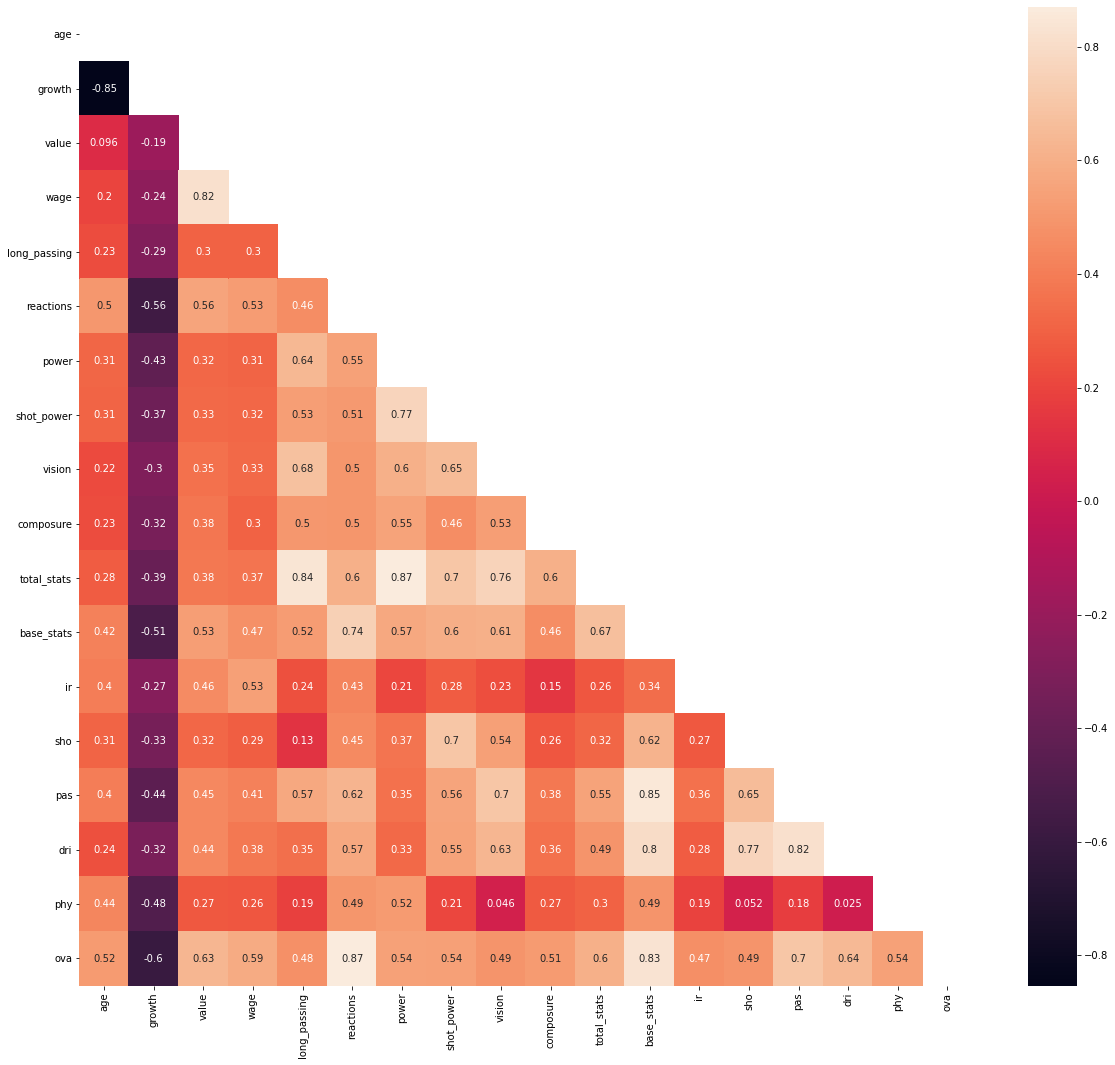

In [78]:
correlations_matrix= num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 18))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [79]:
#sns.pairplot(num)

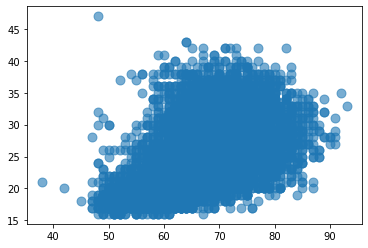

In [80]:
plt.scatter(x=data['ova'], y=data['age'], alpha=0.6, s=80)
plt.show()

In [81]:
# sns.scatterplot(x=feature, y='total_cla', hue='vehicle_c', cmap = 'seismic', size='total_cla', data=nums)
# plt.xlabel('{}'.format(feature), size=15)
# plt.ylabel('total_claim_amount', size=15, labelpad=12.5)
# plt.show() 

In [82]:
cat=data.select_dtypes(include=np.object)

In [83]:
cat.head()

,name,nationality,club,bp,position,foot,a/w,d/w
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,Right,High,Medium
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,Right,High,Low
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Right,High,Medium
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Right,Medium,Medium
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,Right,Low,Medium


In [84]:
cat=cat.drop(columns=['name','nationality','club','bp', 'foot'],axis=1)

In [85]:
encoded=pd.get_dummies(cat, drop_first=True)
print(encoded)
type(encoded)
encoded.shape

       position_ACB  position_CAM  position_CAM CDM  position_CAM CDM CM  \
0                 0             0                 0                    0   
1                 0             0                 0                    0   
2                 0             0                 0                    0   
3                 0             0                 0                    0   
4                 0             0                 0                    0   
...             ...           ...               ...                  ...   
13695             0             0                 0                    0   
13696             0             0                 0                    0   
13697             0             0                 0                    0   
13698             0             0                 0                    0   
13699             0             0                 0                    0   

       position_CAM CDM LM  position_CAM CF  position_CAM CF CM  \
0                   

(13700, 589)

In [86]:
Y = num['ova']
num = num.drop(['ova'], axis=1)

In [87]:
from sklearn.preprocessing import Normalizer #normalizer is an alternative to Standardscaler. Norm distributes between 0 and 1, Sscaler distributes between -1 an +1
fitted = Normalizer().fit(num)
x_normalized = fitted.transform(num)
print(x_normalized.shape)
x_normalized=pd.DataFrame(x_normalized)

(13700, 17)


In [88]:
X = np.concatenate((x_normalized, encoded), axis=1)
pd.DataFrame(X).head()
X.shape

(13700, 606)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [90]:
from sklearn import linear_model

In [91]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

-6.409596870088988e+21

In [92]:
X_train.shape

(9590, 606)

In [93]:
pd.DataFrame(y_train).shape

(9590, 1)

In [94]:
# lm = linear_model.LinearRegression()
# model = lm.fit(X_train,y_train)
# model

In [95]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605
0,0.000009,1.111086e-06,0.999978,0.006667,0.000025,0.000024,0.000124,0.000025,0.000017,0.000026,0.000628,0.000136,3.703621e-07,0.000016,0.000020,0.000021,0.000030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.00

In [96]:
len(lm.predict(X_test))

4110

In [97]:
mse = mean_squared_error(y_test, predictions)
print(mse)

3.0022971441907882e+23


In [98]:
rmse = math.sqrt(mse)
print(rmse)

547932216993.196


In [99]:
r2 = r2_score(y_test, predictions)
r2

-6.409596870088988e+21

In [100]:
n = len(X_test) 
p = X_test.shape[1]

In [101]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

-7.518422363458649e+21